In [1]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Загрузить файл auto.csv

In [2]:
data = pd.read_csv('auto.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
data = data[['symboling', 'normalized-losses', 'wheel-base', 'length',
             'width', 'height', 'curb-weight', 'engine-size', 'bore',
             'stroke', 'compression-ratio', 'peak-rpm', 'city-mpg',
             'highway-mpg', 'price']]
data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
0,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,5000,21,27,13495
1,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,5000,21,27,16500
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,4800,26,27,22470


### Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data.agg([np.mean, np.median, mode, np.min, np.max, np.std])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,5131.463415,25.219512,30.751220,13312.712195
median,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5200.000000,24.000000,30.000000,10295.000000
mode,0.000000,161.000000,94.500000,157.300000,63.800000,50.800000,2385.000000,122.000000,3.620000,3.400000,9.000000,5500.000000,31.000000,25.000000,6785.000000
amin,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000
amax,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,480.933330,6.542142,6.886443,8102.472461


### Рассчитать и визуализировать корреляционную матрицу для переменных

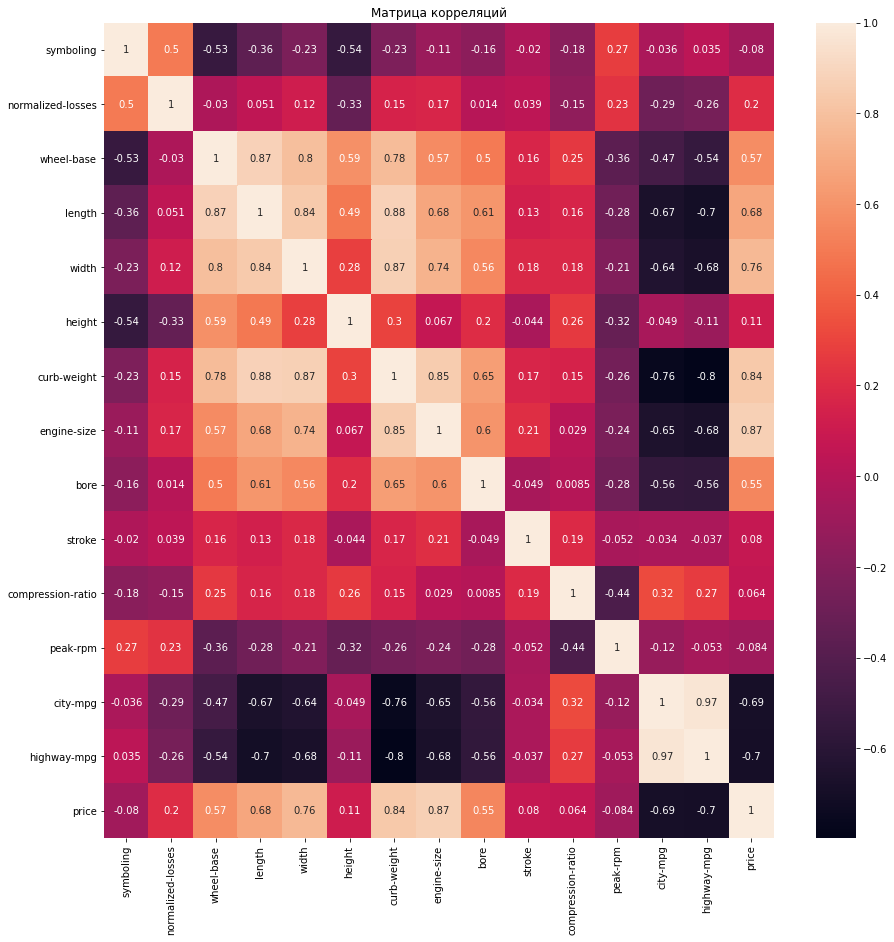

In [5]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

### Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

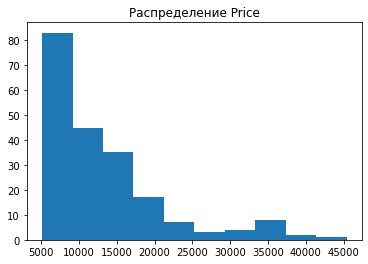

In [6]:
prices = data['price']

plt.hist(prices)
plt.title('Распределение Price')
plt.show()

In [7]:
print(f'Эксцесс: {prices.kurtosis()}')
print(f'Асимметрия: {prices.skew()}')

Эксцесс: 2.948637293212561
Асимметрия: 1.7663998888191028


### Визуализировать несколько взаимосвязей между переменными

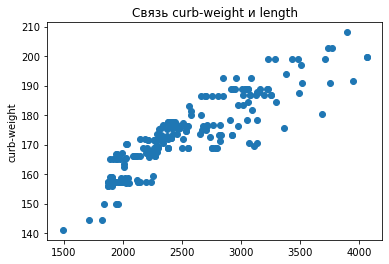

In [8]:
plt.scatter(data['curb-weight'], data['length'])
plt.title('Связь curb-weight и length')
plt.ylabel('curb-weight')
plt.show()

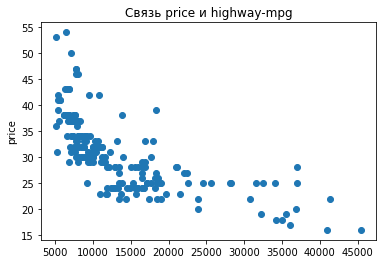

In [9]:
plt.scatter(data['price'], data['highway-mpg'])
plt.title('Связь price и highway-mpg')
plt.ylabel('price')
plt.show()

### Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [10]:
data = pd.read_csv('auto.csv')

Гипотезы можно проверять только для данных близким к нормальным. Выбраны выборки от height и highway-mpg.

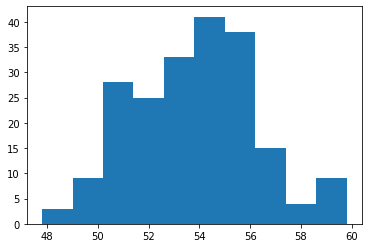

In [11]:
plt.hist(data['height'])
plt.show()

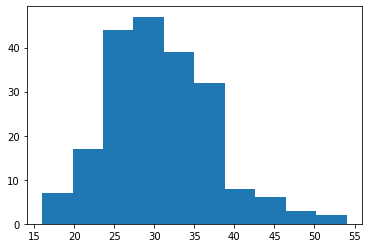

In [12]:
plt.hist(data['highway-mpg'])
plt.show()

$H_0$ - высоты nissan и mazda не отличаются, коэффициент $p$ для отклонения $H_0$ должен быть меньше $0.05$.

In [13]:
arr1 = data[data['make'] == 'nissan']['height']
arr2 = data[data['make'] == 'mazda']['height']

ttest_ind(arr1, arr2)

Ttest_indResult(statistic=0.3887764119844904, pvalue=0.6999387701131479)

Коэффициент  $p > 0.05$, то есть гипотезу $H_0$ не отклоняем.

$H_0$ - расходы топлива на шоссе не отличаются, в зависимости от топливной системы (mpfi или 2bbl), коэффициент $p$ для отказа от $H_0$ должен быть меньше $0.05$

In [14]:
arr1 = data[data['fuel-system'] == 'mpfi']['highway-mpg']
arr2 = data[data['fuel-system'] == '2bbl']['highway-mpg']

ttest_ind(arr1, arr2)

Ttest_indResult(statistic=-14.129253178730886, pvalue=7.915445818445714e-30)

Коэффициент $p < 0.05$, то есть $H_0$ отклоняем, так как размер двигателя отличается в зависимости от топливной системы (mpfi или 2bbl)